# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

In [10]:
import qem
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from qem.image_model import ImageModelFitting
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame(columns=['atoms','StatSTEM','gaussian','lorentzian','voigt','voronoi','ground_truth'])


def fit_cell(image, dx, input_coordinates,model_type='lorentzian'):
    model=ImageModelFitting(image, dx=dx,elements=['Pt'])
    model.pbc = False
    model.fit_background = False
    model.same_width = True
    model.coordinates=input_coordinates/dx-1
    mask = (model.coordinates[:,0]>0) & (model.coordinates[:,0]<image.shape[0]-1) & (model.coordinates[:,1]>0) & (model.coordinates[:,1]<image.shape[1]-1)
    if model_type =='voronoi':
        model.model_type ='gaussian'
        model.init_params()
        model.voronoi_integration()
        return model.voronoi_volume[mask]
    elif model_type =='ground_truth':
        volume = model.image[:-1,:-1].sum()*dx**2/64
        return volume
    else:
        model.model_type = model_type
        params = model.init_params(0.5)
        # params = model.fit_global(params, maxiter=10000, tol=1e-10, verbose=False,step_size=0.001)
        model.minimize(params,tol=1e-5)
    return model.volume[mask]

for i in tqdm(range(1,20)):
    file = f'/home/zzhang/OneDrive/code/qem/data/2016-05_efficientFitProgram/outputFitProgram_Pt_100_{i}atoms.mat'
    legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)
    inputStatSTEM = legacyStatSTEM['input']
    outputStatSTEM = legacyStatSTEM['output']
    image = inputStatSTEM['obs']
    dx = inputStatSTEM['dx']

    input_coordinates = inputStatSTEM['coordinates']
    output_volume = outputStatSTEM['volumes']
    for model_type in ['voronoi','lorentzian','gaussian','voigt','ground_truth']:
        volume = fit_cell(image, dx, input_coordinates,model_type)
        df.loc[i,model_type] = volume
    df.loc[i,'atoms'] = i
    df.loc[i,'StatSTEM'] = output_volume
  


Integrating: 100%|██████████| 81/81 [00:00<00:00, 14082.43it/s]
/home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/scipy/optimize/bfgs.py:102: UserWarning: Explicitly requested dtype float64 requested in eye is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  initial_H = jnp.eye(d, dtype=x0.dtype)
100%|██████████| 19/19 [01:27<00:00,  4.59s/it]


/home/zzhang/miniconda3/envs/jax/lib/python3.11/site-packages/jax/_src/scipy/optimize/bfgs.py:102: UserWarning: Explicitly requested dtype float64 requested in eye is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  initial_H = jnp.eye(d, dtype=x0.dtype)


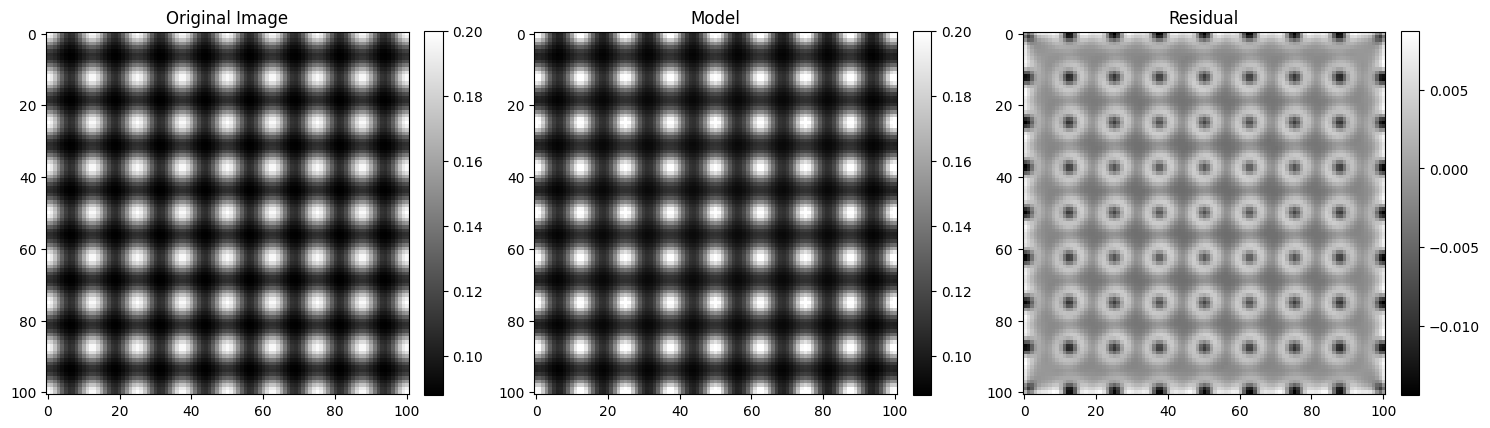

In [13]:
import qem
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from qem.image_model import ImageModelFitting
import pandas as pd
from tqdm import tqdm

df = pd.DataFrame(columns=['atoms','StatSTEM','gaussian','lorentzian','voigt','voronoi','ground_truth'])

file = f'/home/zzhang/OneDrive/code/qem/data/2016-05_efficientFitProgram/outputFitProgram_Pt_100_50atoms.mat'
legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
image = inputStatSTEM['obs']
dx = inputStatSTEM['dx']

input_coordinates = inputStatSTEM['coordinates']
output_volume = outputStatSTEM['volumes']


model=ImageModelFitting(image, dx=dx,elements=['Pt'])
model.pbc = False
model.fit_background = False
model.coordinates=input_coordinates/dx-1
mask = (model.coordinates[:,0]>0) & (model.coordinates[:,0]<image.shape[0]-1) & (model.coordinates[:,1]>0) & (model.coordinates[:,1]<image.shape[1]-1)
model.model_type = 'lorentzian'
params = model.init_params()
# params = model.fit_random_batch(params, maxiter=1000, tol=1e-10, verbose=False,step_size=0.01)
params = model.minimize(params,tol=1e-10)
model.plot_fitting()


In [14]:
model.params

{'gamma': Array([4.6742444], dtype=float32),
 'height': Array([0.17647158, 0.17578278, 0.17599946, 0.17495665, 0.17478935,
        0.17498131, 0.17522927, 0.17639592, 0.17526275, 0.17581876,
        0.16171628, 0.1571365 , 0.15742722, 0.15573302, 0.15748176,
        0.15709655, 0.16185257, 0.17641413, 0.17597406, 0.15716517,
        0.1553446 , 0.15248874, 0.15390816, 0.15254751, 0.15538727,
        0.15708147, 0.17521991, 0.17496607, 0.15742946, 0.15247186,
        0.15248   , 0.15111935, 0.15238827, 0.15254673, 0.1574693 ,
        0.17503086, 0.17481525, 0.1557135 , 0.153939  , 0.15110424,
        0.15203351, 0.15109883, 0.15391922, 0.15571803, 0.17481138,
        0.17500685, 0.15746583, 0.15257134, 0.15239123, 0.1511039 ,
        0.15247007, 0.15245831, 0.1574447 , 0.17495117, 0.17524749,
        0.15708871, 0.15537786, 0.1525535 , 0.1539285 , 0.15246443,
        0.1553299 , 0.15718119, 0.1759962 , 0.17639208, 0.16183937,
        0.15713505, 0.15745606, 0.1557261 , 0.15746267, 0.157

In [15]:
image[:-1,:-1].sum()/64*dx**2

0.47538782062275337

In [16]:
output_volume.mean()

0.47872948030993684

In [20]:
model.volume.mean()

Integrating: 100%|██████████| 64/64 [00:00<00:00, 9432.03it/s]          


(array([0.01320846, 0.01149138, 0.01197722, 0.01149138, 0.01197722,
        0.01149138, 0.01197722, 0.01190744, 0.01149138, 0.01014224,
        0.01044824, 0.01014224, 0.01044824, 0.01014224, 0.01044824,
        0.01051932, 0.01197722, 0.01044824, 0.01091469, 0.01044824,
        0.01091469, 0.01044824, 0.01091469, 0.01085094, 0.01149138,
        0.01014224, 0.01044824, 0.01014224, 0.01044824, 0.01014224,
        0.01044824, 0.01051932, 0.01197722, 0.01044824, 0.01091469,
        0.01044824, 0.01091469, 0.01044824, 0.01091469, 0.01085094,
        0.01149138, 0.01014224, 0.01044824, 0.01014224, 0.01044824,
        0.01014224, 0.01044824, 0.01051932, 0.01197722, 0.01044824,
        0.01091469, 0.01044824, 0.01091469, 0.01044824, 0.01091469,
        0.01085094, 0.01190744, 0.01051932, 0.01085094, 0.01051932,
        0.01085094, 0.01051932, 0.01085094, 0.01092123]),
 <Signal2D, title: , dimensions: (|101, 101)>,
 <Signal2D, title: , dimensions: (|101, 101)>)

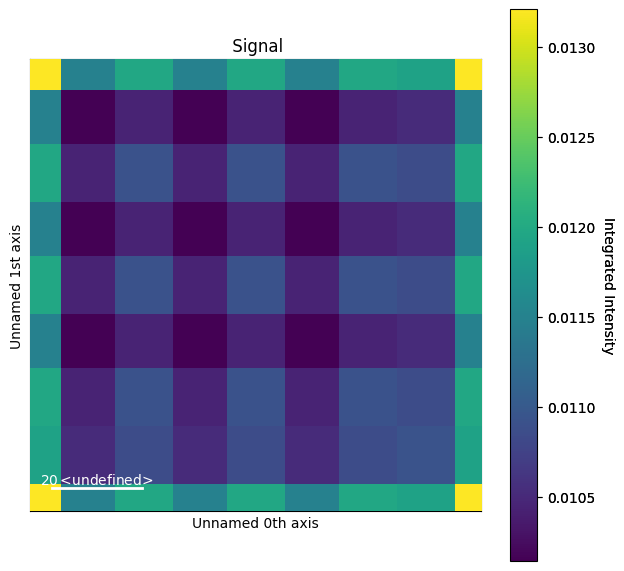

In [1]:
import qem
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from qem.image_model import ImageModelFitting
import pandas as pd
from tqdm import tqdm

file = f'/home/zzhang/OneDrive/code/qem/data/2016-05_efficientFitProgram/outputFitProgram_Pt_100_1atoms.mat'
legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']
image = inputStatSTEM['obs']
dx = inputStatSTEM['dx']

input_coordinates = inputStatSTEM['coordinates']
output_volume = outputStatSTEM['volumes']    
# image = np.ones((101,101))
model=ImageModelFitting(image, dx=dx,elements=['Pt'])
model.coordinates=input_coordinates/dx-1
model.pbc =True
model.fit_background=False
# model.remove_peaks_outside_image()
model.model_type ='gaussian'
model.init_params(0.5/dx)
model.voronoi_integration(plot=True)

In [39]:
model.voronoi_volume[0]

0.0

Text(0, 0.5, 'SCS ($\\AA^2$)')

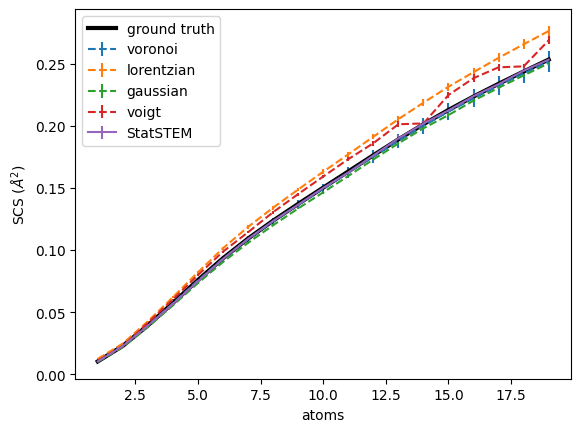

In [11]:
stastem_mean = [x.mean() for x in df['StatSTEM']]
stastem_std = [x.std() for x in df['StatSTEM']]

for model_type in ['voronoi','lorentzian','gaussian','voigt']:
    mean = [x.mean() for x in df[model_type]]
    std = [x.std() for x in df[model_type]]
    plt.errorbar(df['atoms'],mean,yerr=std,label=model_type,linestyle='--')
plt.errorbar(df['atoms'],stastem_mean,yerr=stastem_std,label='StatSTEM')
plt.plot(df['atoms'],df['ground_truth'],label='ground truth', linewidth=3, color='black')
plt.legend()
plt.xlabel('atoms')
plt.ylabel(r'SCS ($\AA^2$)')

Text(0.5, 1.0, 'Residuals')

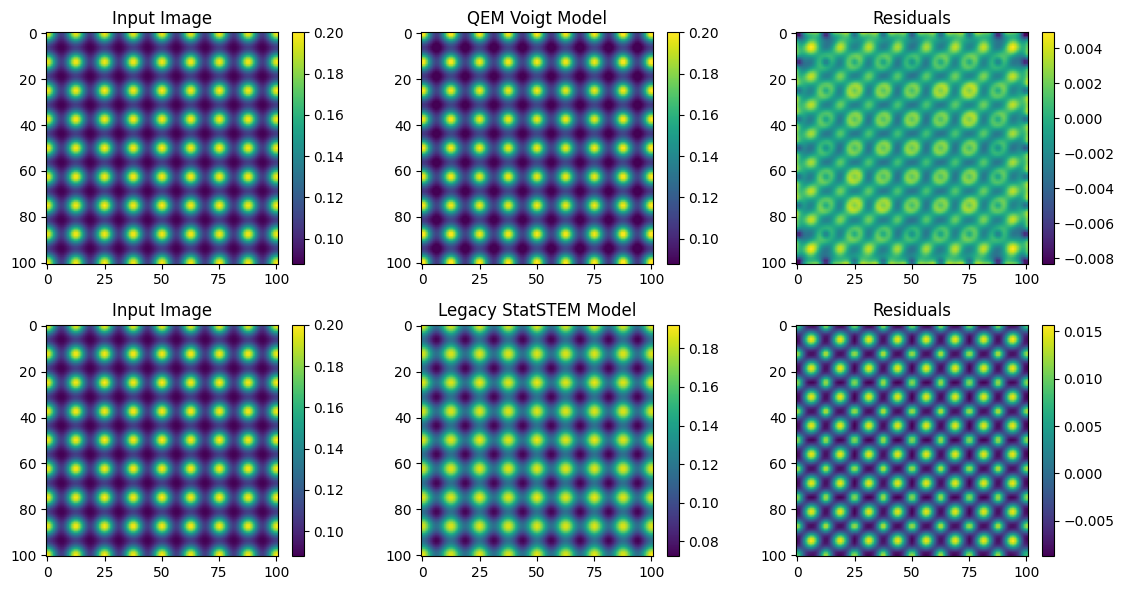

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.model)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Voigt Model')

plt.subplot(2,3,3)
diff = model.image - model.model
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-inputStatSTEM['obs'].max()*0.1,inputStatSTEM['obs'].max()*0.1])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-inputStatSTEM['obs'].max()*0.1,inputStatSTEM['obs'].max()*0.1])
plt.tight_layout()
plt.title('Residuals')